<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
 - Bryan Azahel Juárez Pineda   
 - Luis Felipe Gómez Estrada  
**Fecha:** 22 de febrero del 2021.

**Expediente** : .  
**Expediente** : IF722749.  
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4: Clase 7


### 1 Monte Carlo. 
>Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n=5, p=0.5` y `n=5, p=0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

### 2. Ejercicio de aplicación- Cafetería Central  
> Premisas para la simulación:
>  - Negocio de alimentos que vende bebidas y alimentos.
>  - Negocio dentro del ITESO.
>  - Negocio en cafetería central.
>  - Tipo de clientes (hombres y mujeres).
>  - Rentabilidad del 60%.  
> **Objetivo**  
>Realizar una simulación estimado el tiempo medio que se tardaran los clientes en ser atendidos entre el horario de 6:30 a 1 pm. Además saber el consumo. Analizar supuestos y limitantes    
> **Supuestos**  
 * Mujer = 1 ⟶ aleatorio < 0.5  
 * Hombre = 0 ⟶ aleatorio ≥ 0.5.  
> **Condiciones iniciales:**
 * Todas las distrubuciones de probabilidad se supondrán uniformes.
 * Tiempo de simulación: 6:30 am - 1:30pm $\longrightarrow$ T = 7 horas = 25200 seg.
 * Tiempo de llegada hasta ser atendido: Min=5seg, Max=30seg.
 * Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min= 60seg, Max = 5 min = 300 seg
    - Hombre: Min = 40 seg, Max = 2 min= 120 seg
 * Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos
Responder las siguientes preguntas basados en los datos del problema:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
3. ¿Cuál fue el número de personas atendidas por día?
4. ¿Cuál fue el tiempo de atención promedio?
5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

## Luis Felipe Gómez Estrada

In [49]:
import numpy as np
import scipy.stats as st
from functools import reduce

In [32]:
########### Solución 1
N = 10_000
d1 = np.random.randint(1, 7, size=N)
d2 = st.binom(n=5, p=0.5).rvs(size=N)+1
d3 = st.binom(n=5, p=0.5).rvs(size=N)+1
print('d2, d3 con distribución binomial n=5, p=0.5')
print(f'Probabilidad suma=7: {((d1+d2+d3)==7).sum()*100/N:.2f}%')
print(f'Probabilidad suma=14: {((d1+d2+d3)==14).sum()*100/N:.2f}%')
print(f'Probabilidad suma=18: {((d1+d2+d3)==18).sum()*100/N:.2f}%')
print()

d1 = np.random.randint(1, 7, size=N)
d2 = st.binom(n=5, p=0.2).rvs(size=N)+1
d3 = st.binom(n=5, p=0.2).rvs(size=N)+1
print('d2, d3 con distribución binomial n=5, p=0.2')
print(f'Probabilidad suma=7: {((d1+d2+d3)==7).sum()*100/N:.2f}%')
print(f'Probabilidad suma=14: {((d1+d2+d3)==14).sum()*100/N:.2f}%')
print(f'Probabilidad suma=18: {((d1+d2+d3)==18).sum()*100/N:.2f}%')

d2, d3 con distribución binomial n=5, p=0.5
Probabilidad suma=7: 7.10%
Probabilidad suma=14: 6.06%
Probabilidad suma=18: 0.03%

d2, d3 con distribución binomial n=5, p=0.2
Probabilidad suma=7: 16.18%
Probabilidad suma=14: 0.10%
Probabilidad suma=18: 0.00%


In [116]:
########### Solución 2 - 1
# ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.
def simular_tienda():
    """ Simulación de cafetería.
    Simula el consumo de una cafetería tomando en cuenta ciertos supuestos y condiciones iniciales.
    """
    d = 5
    T = 25200
    T_at_min = 5; T_at_max = 30
    T_mujer_min =60; T_mujer_max = 300
    T_hombre_min = 40; T_hombre_max = 120
    C_mujer_min = 30; C_mujer_max = 100
    C_hombre_min = 20; C_hombre_max = 80

    mujeres_atendidas = 0
    hombres_atendidos = 0
    personas_atendidas = 0

    ingresos_h = 0
    ingresos_w = 0
    ingresos = 0
    
    t_atencion = 0

    while T > 0:
        # Tiempo en que te atienden
        T -= np.random.randint(T_at_min, T_at_max + 1)

        # Género de la persona
        is_woman = 1 if np.random.rand() < 0.5 else 0

        # Descontamos el tiempo y agregamos el gasto dependiendo del género
        if is_woman:
            tiempo = np.random.randint(T_mujer_min, T_mujer_max + 1)
            mujeres_atendidas += 1
            gasto = np.random.randint(C_mujer_min, C_mujer_max + 1)
            ingresos_w += gasto
        else:
            tiempo = np.random.randint(T_hombre_min, T_hombre_max + 1)
            hombres_atendidos += 1
            gasto = np.random.randint(C_hombre_min, C_hombre_max + 1)
            ingresos_h += gasto
        # Descontamos el tiempo
        T -= tiempo
        t_atencion += tiempo
        # Agregamos al total de ingresos
        ingresos += gasto
        # Sumamos a personas atendidas
        personas_atendidas += 1
    return ([mujeres_atendidas, hombres_atendidos, personas_atendidas], [ingresos_w, ingresos_h, ingresos], t_atencion)

gasto_w, gasto_h = tuple(reduce(lambda x,y: [x[0]+y[0], x[1]+y[1]], 
                                [simular_tienda()[1][:2] for i in range(5)]))
print(f'Las mujeres gastaron ${gasto_w} durante los 5 días de trabajo.')
print(f'Los hombres gastaron ${gasto_h} durante los 5 días de trabajo.')

Las mujeres gastaron $29032 durante los 5 días de trabajo.
Los hombres gastaron $20497 durante los 5 días de trabajo.


In [117]:
########### Solución 2 - 2
# ¿Cuál fue el consumo promedio de los hombres y mujeres?
clientes, ingresos, tiempo_atencion = simular_tienda()
print(f'Consumo promedio de mujeres: ${ingresos[0] / clientes[0]:.2f}')
print(f'Consumo promedio de hombres: ${ingresos[1] / clientes[1]:.2f}')

Consumo promedio de mujeres: $68.70
Consumo promedio de hombres: $47.00


In [118]:
########### Solución 2 - 3
# ¿Cuál fue el número de personas atendidas por día?
print(f'Clientes atendidos durante el día: {clientes[2]}')

Clientes atendidos durante el día: 188


In [119]:
########### Solución 2 - 4
# ¿Cuál fue el tiempo de atención promedio?
print(f'El tiempo de atención promedio de cada cliente fue: {tiempo_atencion / clientes[2]:.2f}s')

El tiempo de atención promedio de cada cliente fue: 117.52s


In [120]:
########### Solución 2 - 5
# ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?
ingresos_5_dias = gasto_w+gasto_h
print(f'La cafetería tuvo ingresos de ${ingresos_5_dias:.2f} \ny su rentabilidad fue de ${ingresos_5_dias*0.6:.2f}')

La cafetería tuvo ingresos de $49529.00 
y su rentabilidad fue de $29717.40


# Bryan Azhael Júarez Pineda 

In [4]:
# Importamos librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

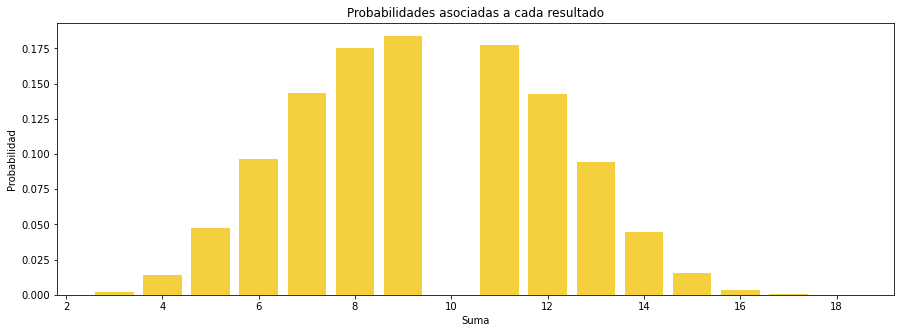

In [7]:
########### Solución 1
# Definimos una función que arroje como resultado la suma de los tres dados
def suma_dados():
    return (np.random.randint(1,7,1)) + (st.binom(n=5, p=0.5).rvs(size=1)) + (st.binom(n=5, p=0.2).rvs(size=1))

# Simulamos 100000 posibles escenarios
# Iteramos y guardamos nuestros resultamos en una lista de resultados
N = 100000
res = [suma_dados() for i in range(N)]

# Graficamos un histograma para visualizar mejor nuestras probabilidades
y, x = np.histogram(res, bins=16, density=True)
plt.figure(figsize=[15,5])
plt.bar(range(3,19), y, color='#F4D03F')
plt.xlabel("Suma")
plt.ylabel("Probabilidad")
plt.title("Probabilidades asociadas a cada resultado");

In [17]:
# Finalmente describimos las probabilidades para que la suma sea igual a 7, 14 y 18
print(f'Probabilidad de que la suma sea 7: {y[4]}')
print(f'Probabilidad de que la suma sea 14: {y[11]}')
print(f'Probabilidad de que la suma sea 18: {y[15]}')

Probabilidad de que la suma sea 7: 0.1436457142857143
Probabilidad de que la suma sea 14: 0.04489142857142857
Probabilidad de que la suma sea 18: 6.857142857142857e-05


In [19]:
########### Solución 2 - 1
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80

# Definimos algunas otras variables a utilizar
escenarios = 1
tiempo_atencion = np.random.randint(5, 31, escenarios)
atencion_hombres = np.random.randint(40, 121, escenarios)
atencion_mujeres = np.random.randint(60, 300, escenarios)

# Comenzamos a iterar tanto sobre los 5 dias (d) como el tiempo que queremos por dia (T)
# Variables iniciales
dia = 0
gasto_total_mujeres = 0
gasto_total_hombres = 0

# Empezamos a iterar sobre los dias
while dia <= d:
    
    # Variables auxiliares que nos ayudaran a definir valores parciales por cada dia
    tiempo = 0
    gasto_parcial_mujeres = 0
    gasto_parcial_hombres = 0
    
    # Segundo ciclo, iteracion por tiempo
    while tiempo <= T:
        if np.random.randint(0,2) == 0:
            gasto_parcial_mujeres += np.mean(np.random.randint(C_mujer_min, C_mujer_max))
            tiempo += np.mean(tiempo_atencion) + np.mean(atencion_mujeres)
        elif np.random.randint(0,2) == 1:
            gasto_parcial_hombres += np.mean(np.random.randint(C_hombre_min, C_hombre_max))
            tiempo += np.mean(tiempo_atencion) + np.mean(atencion_hombres)
            
    # Almacenamos los gastos totales compuestos de los parciales correspondientes a cada dia
    gasto_total_mujeres += gasto_parcial_mujeres
    gasto_total_hombres += gasto_parcial_hombres
    dia += 1
    
gasto_total_hombres, gasto_total_mujeres

(10230.0, 31441.0)

In [31]:
# Mostramos los valores correspondientes a los gastos totales en 5 dias
print(f'El gasto en 5 días en total es igual a ${int(gasto_total_hombres + gasto_total_mujeres)}')
print(f'''Donde ${int(gasto_total_mujeres)} corresponden a los gastos de las mujeres y 
      ${int(gasto_total_hombres)} al de los hombres''')


El gasto en 5 días en total es igual a $41671
Donde $31441 corresponden a los gastos de las mujeres y 
      $10230 al de los hombres


In [3]:
########### Solución 2 - 2



In [4]:
########### Solución 2 - 3


In [5]:
########### Solución 2 - 4


In [6]:
########### Solución 2 - 5


Enlace repositorio: https://github.com/if722749/ProyectoConjunto_BAJuarez_LFGomez